In [3]:
# IMPORT NECESSARY LIBRARIES
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.regularizers import l2
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import to_categorical
from sklearn.metrics import classification_report

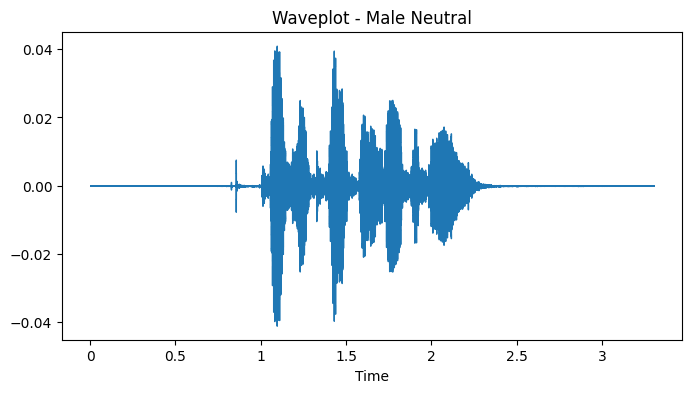

In [27]:
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt

# LOAD IN FILE
x, sr = librosa.load('C:/Users/seanr/Individual Project/Actor_01/03-01-01-01-01-01-01.wav')

# PLAY AUDIO FILE
ipd.Audio(x, rate=sr)

# DISPLAY WAVEPLOT
plt.figure(figsize=(8, 4))
librosa.display.waveshow(x, sr=sr)
plt.title('Waveplot - Male Neutral')
plt.savefig('Waveplot_MaleNeutral.png')
plt.show()


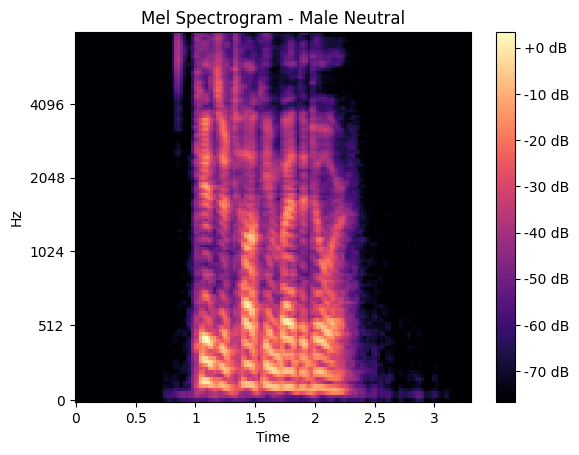

In [28]:
# CREATE LOG MEL SPECTROGRAM
spectrogram = librosa.feature.melspectrogram(y=x, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Neutral')
plt.savefig('MelSpec_MaleNeutral.png')
plt.colorbar(format='%+2.0f dB');

In [2]:
# CREATE FUNCTION TO EXTRACT EMOTION NUMBER AND FILEPATH
import os
import pandas as pd
import numpy as np

audio = r'C:\Users\seanr\Individual Project\ravdess'

emotion = []
file_path = []
for i in range(1, 25):
    actor_folder = "Actor_{:02d}".format(i)
    filename = os.listdir(audio + '\\' + actor_folder)
    for f in filename:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        file_path.append(audio + '\\' + actor_folder + '\\' + f)
audio_df = pd.DataFrame(emotion)
audio_df = audio_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
audio_df.columns = ['emotion']
audio_df = pd.concat([audio_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)
print (audio_df)

import pandas as pd
import librosa
df = pd.DataFrame(columns=['mel_spectrogram'])
counter=0
for index,path in enumerate(audio_df.path):
    X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=3,sr=44100,offset=0.5)

    spectrogram = librosa.feature.melspectrogram(y=X, sr=sample_rate, n_mels=128,fmax=8000) 
    db_spec = librosa.power_to_db(spectrogram)

    log_spectrogram = np.mean(db_spec, axis = 0)
        
    df.loc[len(df)] = [log_spectrogram]
    counter=counter+1
print(len(df))
df.head()

audio_mel_df = pd.concat([audio_df, df], axis=1)

audio_mel_df.dropna(inplace=True)

print(audio_mel_df.head())



from sklearn.model_selection import train_test_split

X = np.array(df['mel_spectrogram'].tolist())
X = X.reshape(X.shape[0], -1, 1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(audio_df['emotion'])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)







       emotion                                               path
0      neutral  C:\Users\seanr\Individual Project\ravdess\Acto...
1      neutral  C:\Users\seanr\Individual Project\ravdess\Acto...
2      neutral  C:\Users\seanr\Individual Project\ravdess\Acto...
3      neutral  C:\Users\seanr\Individual Project\ravdess\Acto...
4         calm  C:\Users\seanr\Individual Project\ravdess\Acto...
...        ...                                                ...
1435  surprise  C:\Users\seanr\Individual Project\ravdess\Acto...
1436  surprise  C:\Users\seanr\Individual Project\ravdess\Acto...
1437  surprise  C:\Users\seanr\Individual Project\ravdess\Acto...
1438  surprise  C:\Users\seanr\Individual Project\ravdess\Acto...
1439  surprise  C:\Users\seanr\Individual Project\ravdess\Acto...

[1440 rows x 2 columns]
1440
   emotion                                               path  \
0  neutral  C:\Users\seanr\Individual Project\ravdess\Acto...   
1  neutral  C:\Users\seanr\Individual Project\ra

C:\Users\seanr\AppData\Local\Temp\ipykernel_9572\2016391329.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(df['mel_spectrogram'].tolist())


1440
   emotion                                               path  \
0  neutral  C:\Users\seanr\Individual Project\ravdess\Acto...   
1  neutral  C:\Users\seanr\Individual Project\ravdess\Acto...   
2  neutral  C:\Users\seanr\Individual Project\ravdess\Acto...   
3  neutral  C:\Users\seanr\Individual Project\ravdess\Acto...   
4     calm  C:\Users\seanr\Individual Project\ravdess\Acto...   

                                     mel_spectrogram  
0  [-76.38517, -76.38517, -76.38517, -76.38517, -...  
1  [-75.48293, -75.4404, -75.554375, -75.20429, -...  
2  [-75.15079, -75.15079, -75.15079, -75.15079, -...  
3  [-75.268524, -75.268524, -75.268524, -75.26852...  
4  [-80.14777, -80.14777, -80.14777, -80.14777, -...  
X_train shape: (1152, 1, 1)
y_train shape: (1152,)
X_test shape: (288, 1, 1)
y_test shape: (288,)


C:\Users\seanr\AppData\Local\Temp\ipykernel_24880\1433150903.py:35: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(df['mel_spectrogram'].tolist())


emotion    object
path       object
dtype: object
